In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import trapz


In [2]:
 def V(xi):
    return xi**2

def b(eps,xi):
    return (h**2/12)*(2*eps-xi**2)


In [3]:
def numerov(n1,n2,eps):
    psi = np.array(xi)*0  
    j   = np.sign(n2-n1)
    psi[n1]=0
    psi[n1+j]=1.0e-6

    for i in range(n1+2*j,n2+j,j):
       psi[i] = ( 2*psi[i-j]*(1-5*b(eps,xi[i-j])) - psi[i-2*j]*(1+b(eps,xi[i-2*j])))/(1+b(eps,xi[i]))
    return psi


In [4]:
def evalDerivative(eps):
    global psir,psil
    psil = numerov(0,nmatch+1,eps)
    psir = numerov(n-1,nmatch-1,eps)

    psir = (psil[nmatch]/psir[nmatch])*psir
 
    der_r = (psir[nmatch+1]-psir[nmatch-1])/(2*h)
    der_l = (psil[nmatch+1]-psil[nmatch-1])/(2*h)
  
    diff = der_l-der_r

    return diff


In [5]:
def findE(emin,emax,tol):
    while (emax-emin>tol):
        emed = (emin+emax)/2
        if evalDerivative(emin)*evalDerivative(emed)<0:
            emax = emed
        else:
            emin = emed
    return (emin+emax)/2;


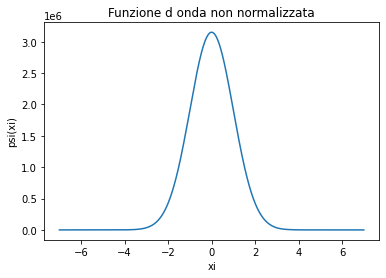

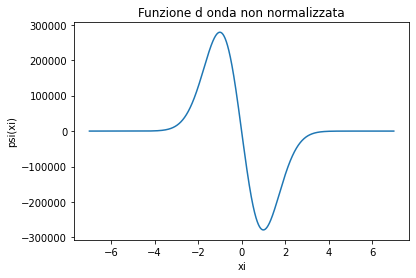

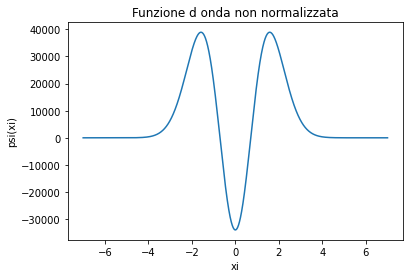

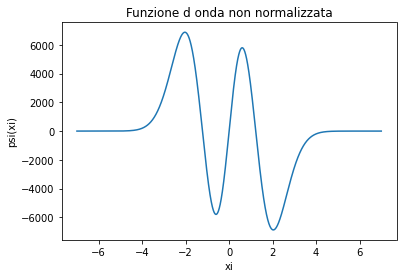

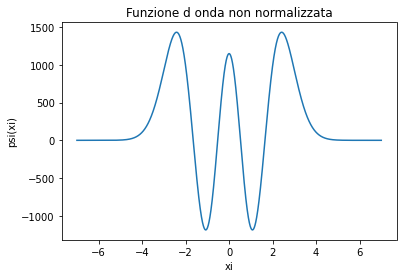

Per valori di Epsilon compresi tra 0 e 5 quelli che corrispondono a stati fisici sono:
0.4999658203125
1.4999853515625006
2.5000048828125
3.5000244140624988
4.5000439453124965


In [6]:
''' 
  Codice principale: l'esecuzione dello script parte da qui
'''
n       = 14000
nmatch  = 10000
xi      = np.linspace(-7.,7,n)
h       = xi[1]-xi[0]

Emin=0
Emax=5
delta_e=0.09
energy=delta_e
Epsilon=[]


while (energy<Emax):
    if(evalDerivative(energy)*evalDerivative(energy+delta_e)<0):
        Epsilon.append(findE(energy,energy+delta_e,0.0001))
        psiTot=np.empty(n)
        for i in range(0,nmatch+1):
            psiTot[i]=psil[i]

        for i in range(nmatch+1,n):
            psiTot[i]=psir[i]

        plt.plot(xi,psiTot)
        plt.xlabel('xi')
        plt.ylabel('psi(xi)')
        plt.title('Funzione d onda non normalizzata')
        plt.show()
    energy+=delta_e
    
print('Per valori di Epsilon compresi tra 0 e 5 quelli che corrispondono a stati fisici sono:')
for i in range(len(Epsilon)): print(f'{Epsilon[i]}')



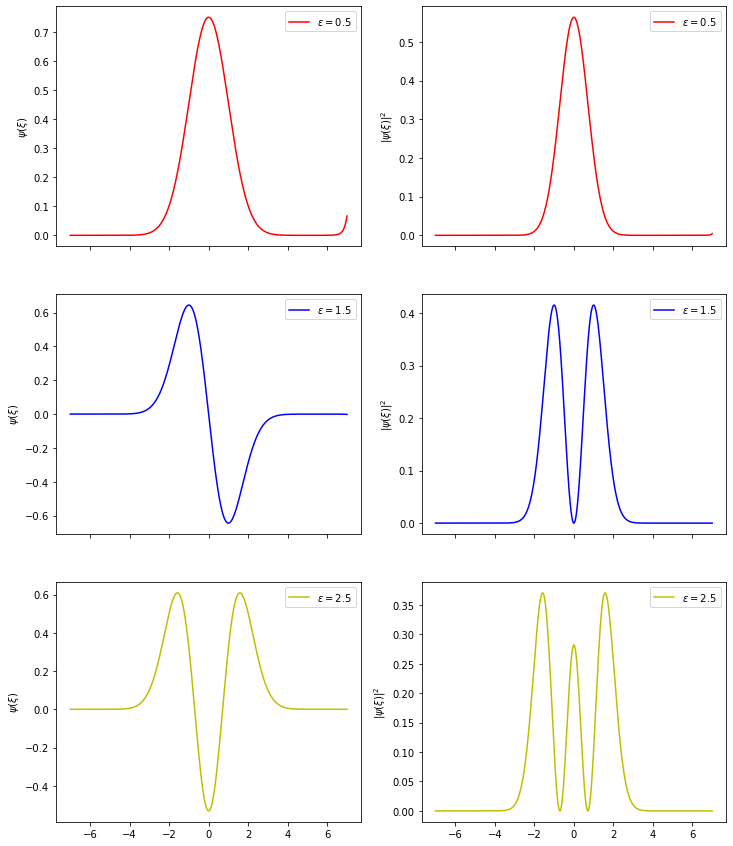

In [7]:
Epsilon=[0.5,1.5,2.5]
Color=['r','b','y']

fig, ax = plt.subplots(len(Epsilon),2, sharex='col',figsize=(12,5*len(Epsilon)))
for i in range(len(Epsilon)):
    psi = numerov(0,n-1,Epsilon[i])
    psi2 = np.abs(psi)**2
    I = trapz(psi2,xi)
    psi = psi/np.sqrt(I)
    psi2 = psi2/I
    
    ax[i, 0].plot(xi, psi,color=Color[i],label=f'$\\varepsilon = {Epsilon[i]}$')
    ax[i,0].set_ylabel('$\\psi(\\xi)$')
    ax[i,0].legend()
    ax[i,1].plot(xi,psi2,color=Color[i],label=f'$\\varepsilon = {Epsilon[i]}$')
    ax[i,1].set_ylabel('$|\\psi(\\xi)|^2$')
    ax[i,1].legend()



alpha = 187526799809.2301


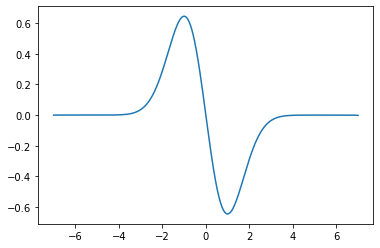

In [8]:

epsilon0 = 1.5 

psi0=numerov(0,n-1,epsilon0)
I0=trapz(abs(psi0)**2,xi)
print("alpha =",I0)

psi0N=psi0/math.sqrt(abs(I0))

plt.plot(xi,psi0N)
plt.show()